# Ilianne’s Law Calibration
Using real Planck TT Power Spectrum from `.txt` format.

In [1]:
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\glace\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load and parse the Planck TT power spectrum from .txt file
data = np.loadtxt("COM_PowerSpect_CMB-TT-full_R3.01.txt", skiprows=1)

ell = data[:, 0]     # Multipole moment ℓ
d_ell = data[:, 1]   # D_ell
cl = d_ell * 2 * np.pi / (ell * (ell + 1))  # Convert D_ell to C_ell

# Focus on low-ℓ
mask = (ell >= 2) & (ell <= 50)
ell_low = ell[mask]
cl_low = cl[mask]


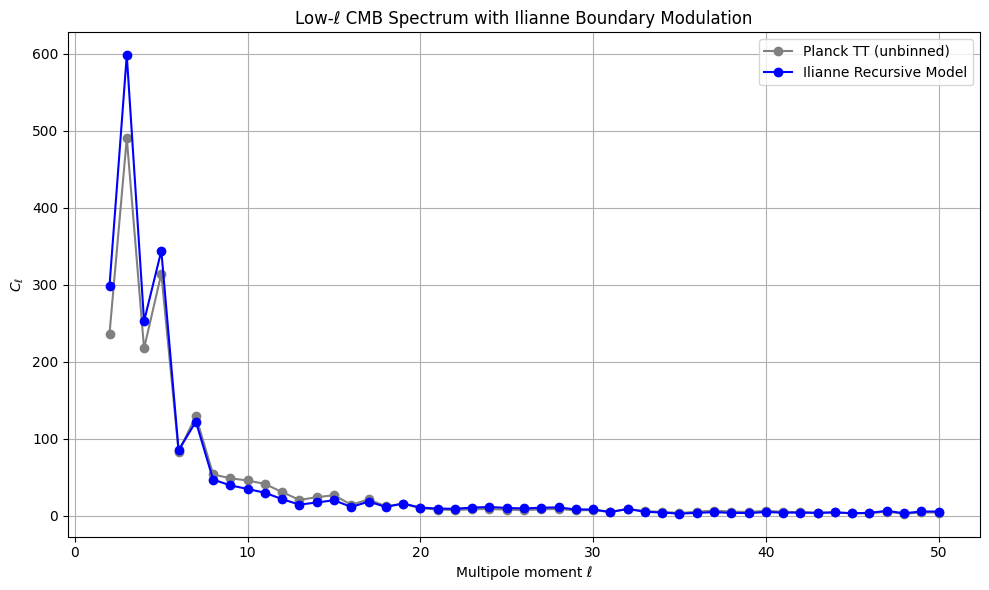

In [4]:
# Ilianne recursive modulation function
def ilianne_model(ell, base_cl, epsilon=0.3, omega=0.25, delta=0, B=1.0):
    return base_cl * (1 + epsilon * np.cos(omega * ell * B + delta))

cl_ilianne = ilianne_model(ell_low, cl_low)

plt.figure(figsize=(10, 6))
plt.plot(ell_low, cl_low, 'o-', label="Planck TT (unbinned)", color='gray')
plt.plot(ell_low, cl_ilianne, 'o-', label="Ilianne Recursive Model", color='blue')
plt.xlabel("Multipole moment ℓ")
plt.ylabel(r"$C_ℓ$")
plt.title("Low-ℓ CMB Spectrum with Ilianne Boundary Modulation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


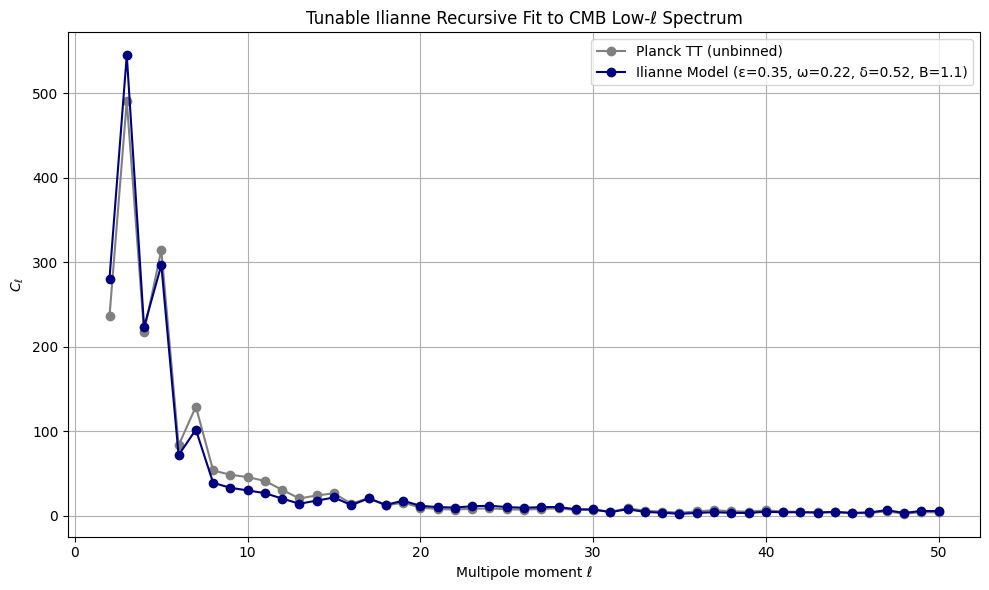

In [5]:
# 🎛️ Adjustable parameters
epsilon = 0.35
omega = 0.22
delta = np.pi / 6
B = 1.1

cl_ilianne = ilianne_model(ell_low, cl_low, epsilon, omega, delta, B)

plt.figure(figsize=(10, 6))
plt.plot(ell_low, cl_low, 'o-', label="Planck TT (unbinned)", color='gray')
plt.plot(ell_low, cl_ilianne, 'o-', label=f"Ilianne Model (ε={epsilon}, ω={omega}, δ={delta:.2f}, B={B})", color='navy')
plt.xlabel("Multipole moment ℓ")
plt.ylabel(r"$C_ℓ$")
plt.title("Tunable Ilianne Recursive Fit to CMB Low-ℓ Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
